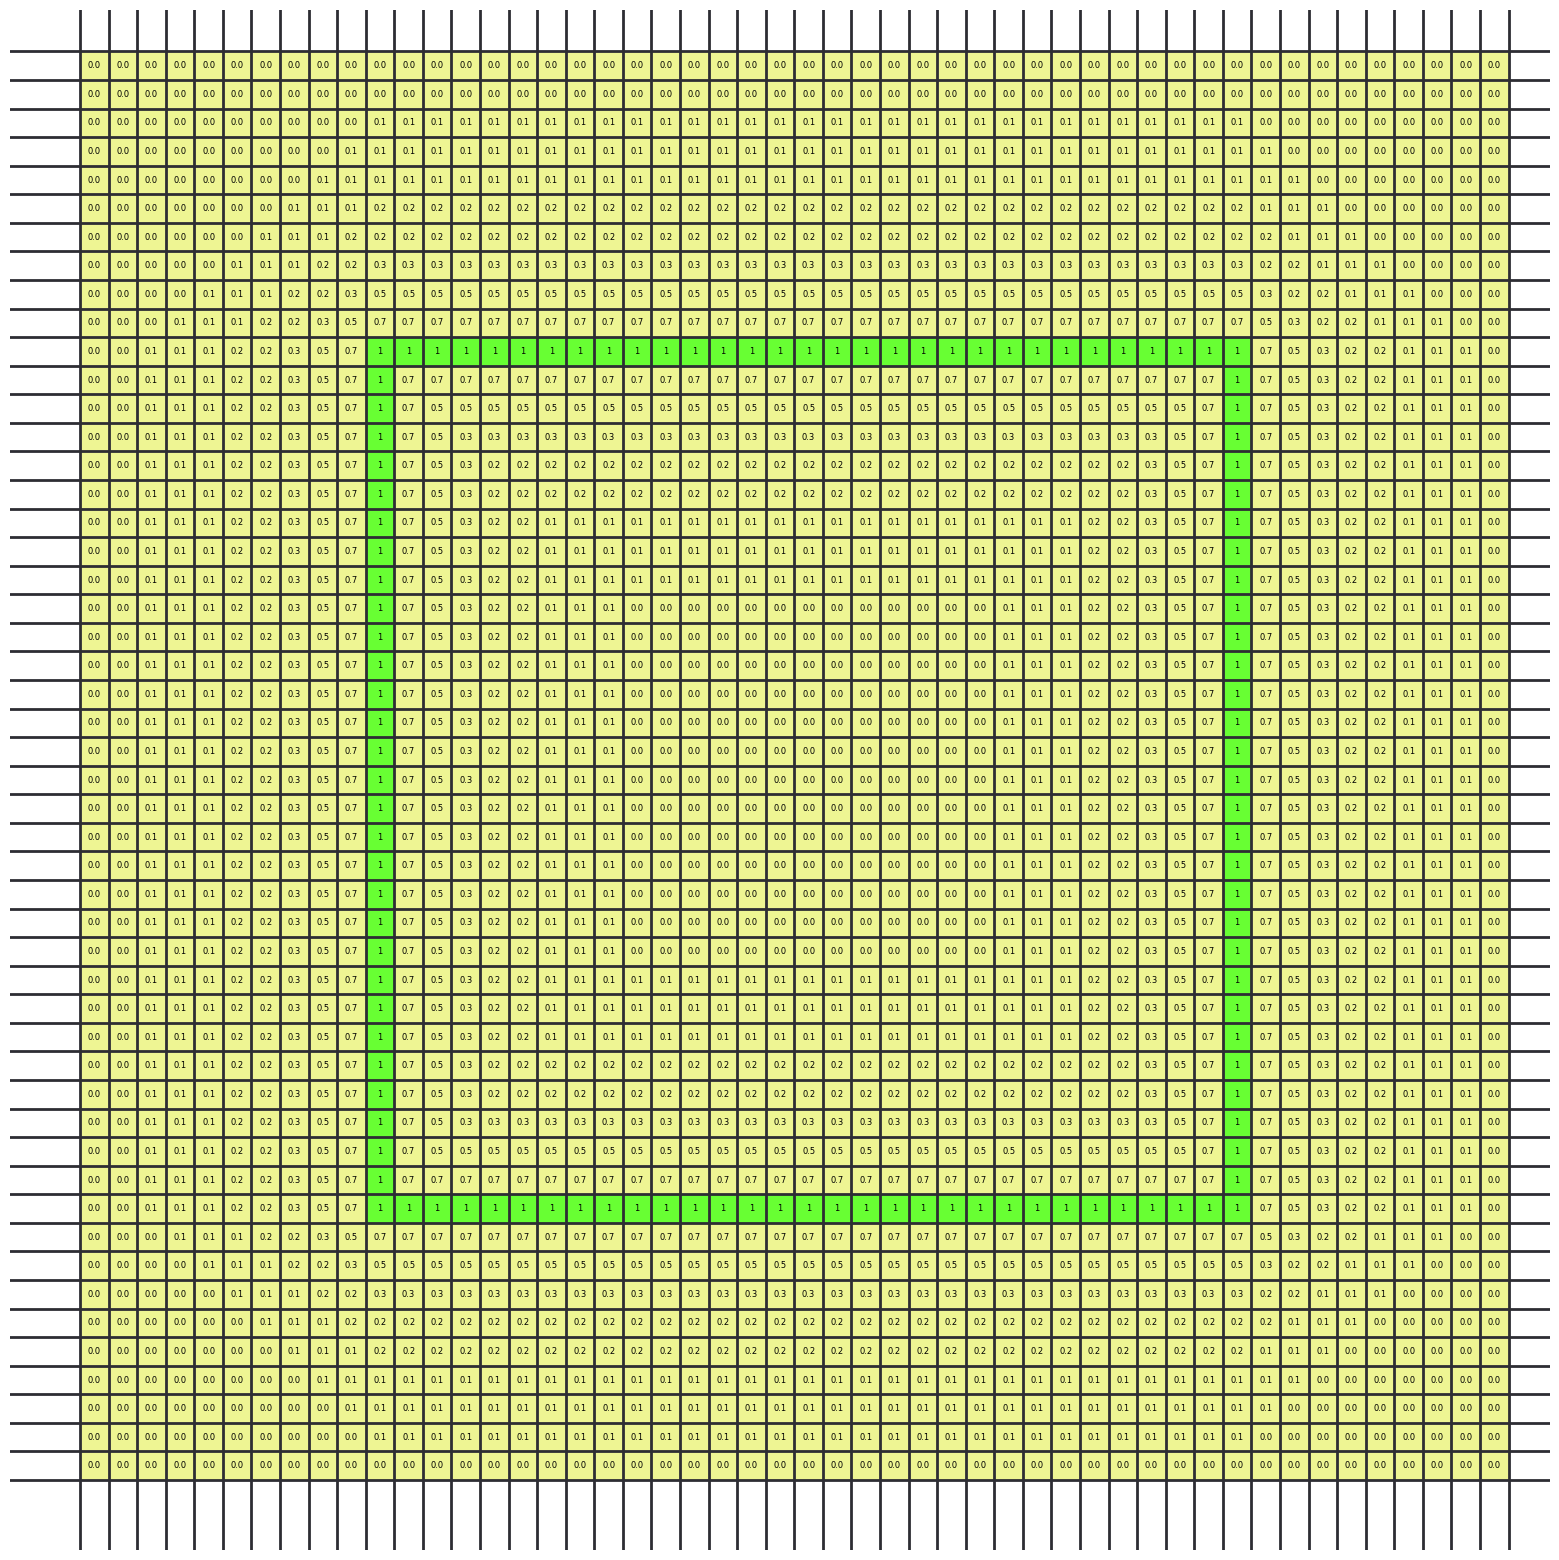

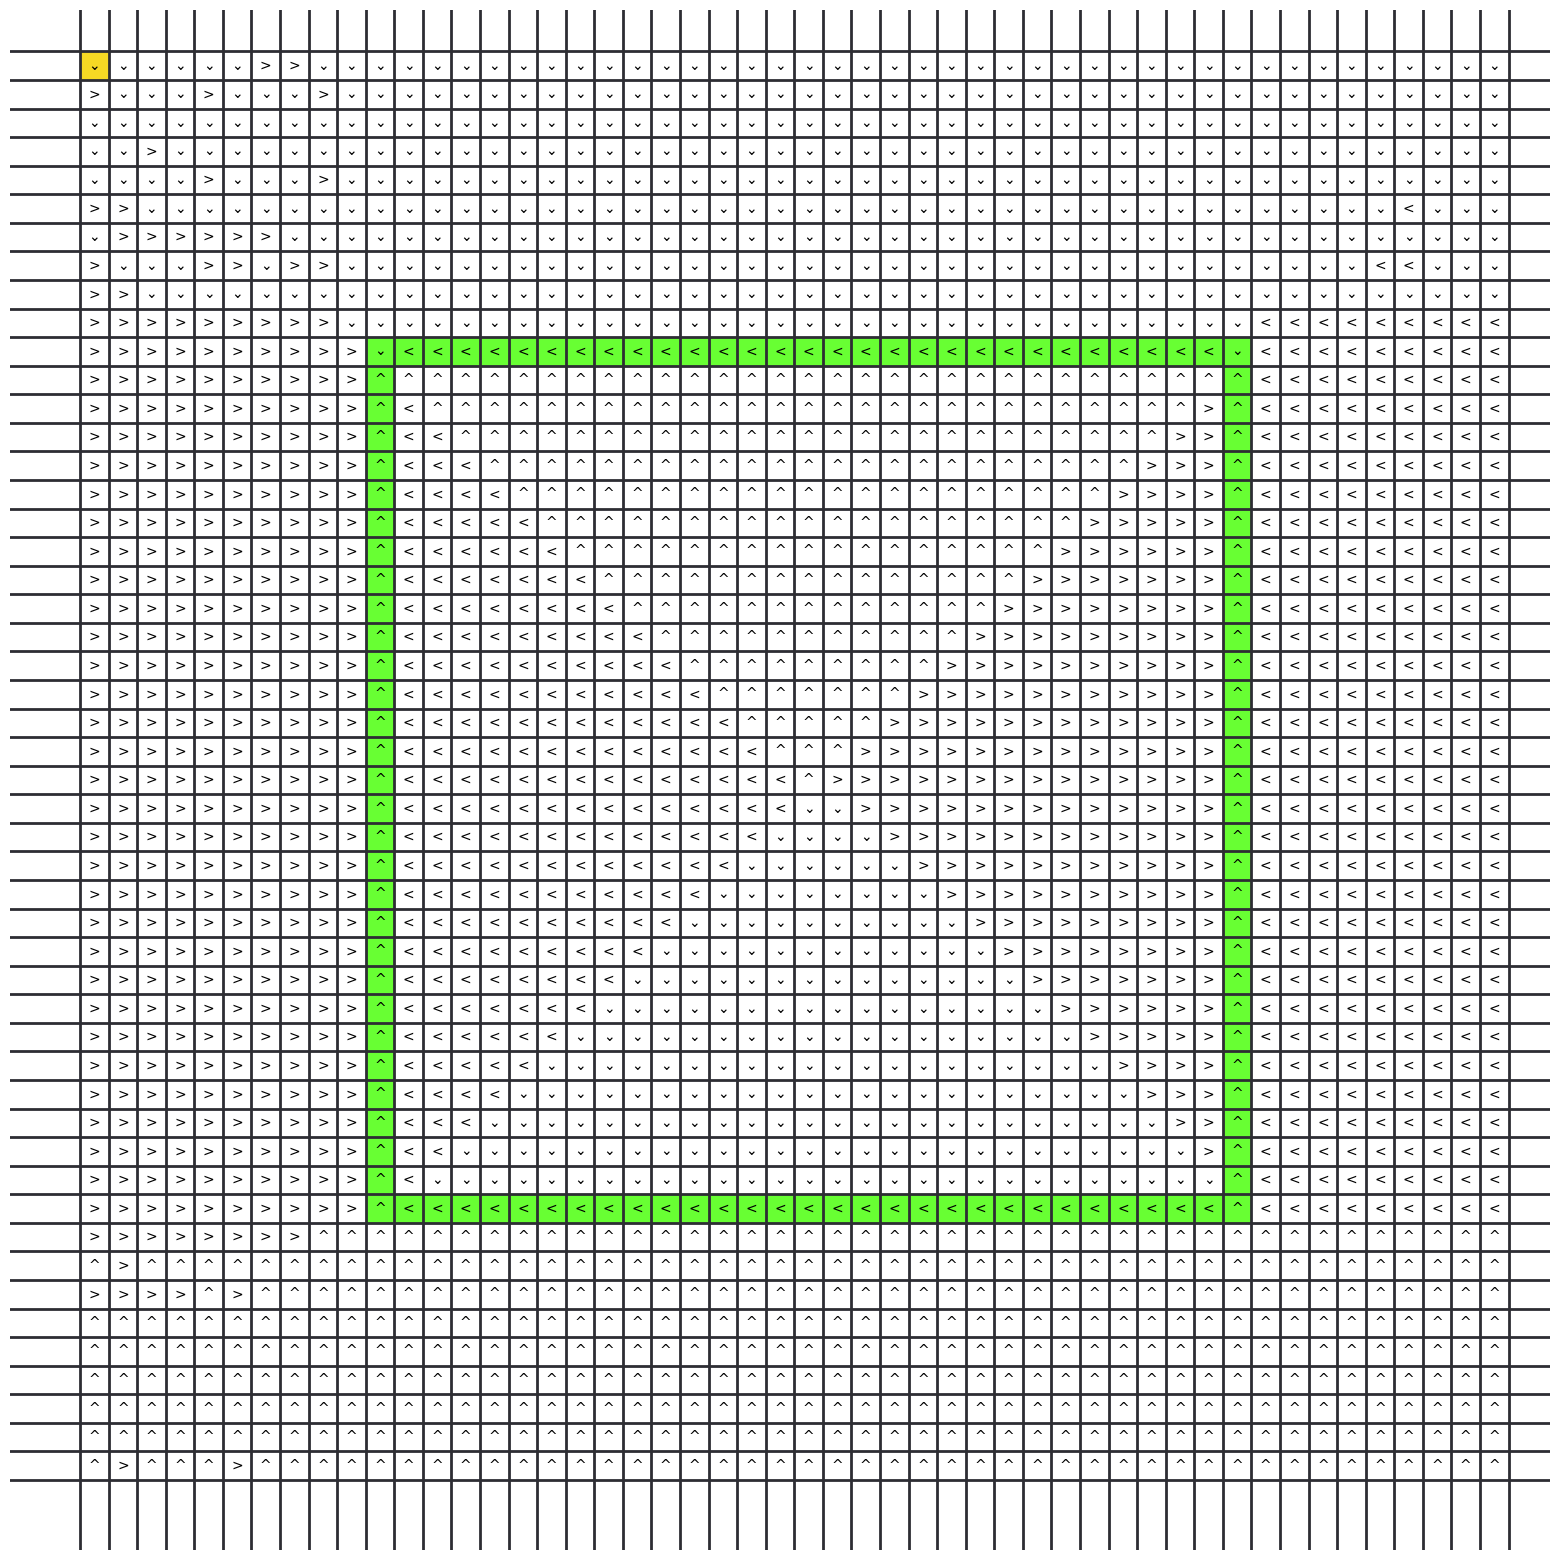

In [1]:
from canvas import Canvas
from policy import PolicyIteration
import random

rows, columns = 50, 50

# Inicializo el tablero con todas las recompensas en cero
board = [[' ' for _ in range(columns)] for _ in range(rows)]

# Defino las recompensas de acuerdo a la figura que queremos dibujar.
for i in range(rows):
    for j in range(columns):
        if i == 10 and j >= 10 and j <= 40:
            board[i][j] = '1'
        if i == 40 and j >= 10 and j <= 40:
            board[i][j] = '1'
        if j == 40 and i >= 10 and i <= 40:
            board[i][j] = '1'
        if j == 10 and i >= 10 and i <= 40:
            board[i][j] = '1'

#board[10][10] = '10'
#board[10][15] = '2'
#board[10][20] = '3'
#board[10][25] = '4'
#board[10][30] = '5'
#board[10][35] = '6'
#board[10][40] = '20'
#board[40][40] = '2000'
#board[40][10] = '3000'

board[0][0] = 'S'
env = Canvas(board)

# Creación del agente
agent = PolicyIteration(env, discount=0.7)
agent.policy_iteration()
vals = agent.values
#env.plot()
env.plot_rainbow()
env.plot_policy(agent.policy)

In [1]:
from canvas import Canvas
from policy import PolicyIteration
from logo import Logo
import random

rows, columns = 50, 50

# Inicializo el tablero con todas las recompensas en cero
board = [[' ' for _ in range(columns)] for _ in range(rows)]

# Defino las recompensas de acuerdo a la figura que queremos dibujar.
for i in range(rows):
    for j in range(columns):
        if i == 10 and j >= 10 and j <= 40:
            board[i][j] = '+1'
        if i == 40 and j >= 10 and j <= 40:
            board[i][j] = '+1'
        if j == 40 and i >= 10 and i <= 40:
            board[i][j] = '+1'
        if j == 10 and i >= 10 and i <= 40:
            board[i][j] = '+1'

board[0][0] = 'S'
env = Canvas(board)

# Creación del agente
agent = PolicyIteration(env)
agent.policy_iteration()

iterations = 1000
state = (0, 0)
agent.mdp.initial_state = state
agent.mdp.state = state
pivot_state = state

logo = Logo(env=agent.mdp)
last_action = None

for iteration in range(iterations):
    policy = agent.policy[pivot_state[0]][pivot_state[1]]

    if agent.mdp.actions_collide(policy, last_action):
        pivot_state = (random.randrange(0, rows), random.randrange(0, columns))
        logo.go_to(pivot_state)
        agent.mdp.state = pivot_state
        print('Collision. Jumping')
        last_action = None

    else:
        if policy == 'down':
            logo.down()
        if policy == 'up':
            logo.up()
        if policy == 'left':
            logo.left()
        if policy == 'right':
            logo.right()

        last_action = policy
        agent.mdp.do_action(policy)
        pivot_state = agent.mdp.state

    print(f'current position: pivot_state: {pivot_state}, mdp.state: {agent.mdp.state} run {policy}')

2024-05-04 15:39:28.595 Python[36585:22453855] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


OK, jumping to (0, 0)
current position: pivot_state: (1, 0), mdp.state: (1, 0) run down
current position: pivot_state: (2, 0), mdp.state: (2, 0) run down
current position: pivot_state: (2, 1), mdp.state: (2, 1) run right
current position: pivot_state: (3, 1), mdp.state: (3, 1) run down
current position: pivot_state: (3, 2), mdp.state: (3, 2) run right
current position: pivot_state: (4, 2), mdp.state: (4, 2) run down
current position: pivot_state: (4, 3), mdp.state: (4, 3) run right
current position: pivot_state: (4, 4), mdp.state: (4, 4) run right
current position: pivot_state: (5, 4), mdp.state: (5, 4) run down
current position: pivot_state: (5, 5), mdp.state: (5, 5) run right
current position: pivot_state: (6, 5), mdp.state: (6, 5) run down
current position: pivot_state: (7, 5), mdp.state: (7, 5) run down
current position: pivot_state: (7, 6), mdp.state: (7, 6) run right
current position: pivot_state: (8, 6), mdp.state: (8, 6) run down
current position: pivot_state: (9, 6), mdp.state

IndexError: list index out of range

: 